# Sesión 1 – Apartado 1: Entorno profesional y *Stack* habitual

**Objetivos:**
- Conocer el *stack* típico de ciencia de datos con Python.
- Preparar un entorno reproducible y una estructura de proyecto.
- Cargar un dataset y realizar una EDA inicial con gráficos sencillos.

## 0) Gestión de entornos y paquetes (prácticas recomendadas)

Breve resumen de buenas prácticas para gestionar dependencias en proyectos de ciencia de datos:

- Usa un entorno virtual aislado por proyecto (conda o venv). Esto evita conflictos entre versiones de paquetes.
- Mantén un archivo de dependencias: `requirements.txt` para `pip` o `environment.yml` para `conda`.
- Congela versiones cuando compartas resultados reproducibles (por ejemplo, `pip freeze > requirements.txt`).
- Para tareas reproducibles en notebooks, documenta las versiones clave (por ejemplo, `pandas`, `numpy`, `matplotlib`) al inicio del notebook.
- Si trabajas con datos grandes, considera gestionar paquetes y entornos en un entorno con más memoria o en la nube.

Ejemplo rápido: cómo crear un `requirements.txt` desde el entorno actual (línea de comandos):

```powershell
pip freeze > requirements.txt
```

Y para `conda` crear un `environment.yml` (captura entorno y canales):

```powershell
conda env export --no-builds -n myenv > environment.yml
```

## 1) Stack habitual

Usaremos las siguientes librerías:

- `pandas` para manipulación de datos
- `numpy` para operaciones numéricas
- `scikit-learn` para *ML* y *pipelines*
- `matplotlib` para visualización básica
- `seaborn` (opcional) para visualizaciones de alto nivel

💡 Recomendación: usar un entorno virtual (conda/venv) y un fichero `requirements.txt`.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print('Python:', sys.version)
print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('matplotlib:', plt.matplotlib.__version__)
print('seaborn:', sns.__version__)
print('scikit-learn:', sklearn.__version__)

Python: 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
numpy: 2.3.3
pandas: 2.3.2
matplotlib: 3.10.6
seaborn: 0.13.2
scikit-learn: 1.7.2


## 2) NumPy en 5 minutos (antes de cargar datos)
NumPy es la base numérica de Python y `pandas` se apoya en él. Conceptos clave:
- Arrays `ndarray` (homogéneos y vectorizados)
- Indexado, slicing y máscaras booleanas
- Broadcasting (operaciones entre arrays de diferentes formas compatibles)
- Agregaciones rápidas (`mean`, `sum`, etc.)
- Álgebra lineal básica (`dot`, `matmul`, `inv`, `eig`)

Debajo tienes ejemplos rápidos que puedes ejecutar.

In [2]:
# Crear arrays y formas
A = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([10, 20, 30])
print("A shape:", A.shape, "b shape:", b.shape)

A shape: (2, 3) b shape: (3,)


In [3]:
# Slicing e indexado
print("A[0, 1] =", A[0, 1])
print("Primera fila:", A[0])
print("Última columna:", A[:, -1])

A[0, 1] = 2
Primera fila: [1 2 3]
Última columna: [3 6]


In [4]:
# Máscara booleana
mask = A % 2 == 0
print("Máscara pares:\n", mask)
print("Elementos pares:", A[mask])

Máscara pares:
 [[False  True False]
 [ True False  True]]
Elementos pares: [2 4 6]


In [5]:
# Broadcasting (suma vector b a cada fila de A)
C = A + b
print("C = A + b ->\n", C)

C = A + b ->
 [[11 22 33]
 [14 25 36]]


In [6]:
# Agregaciones
print("Media por columnas:", A.mean(axis=0))
print("Suma por filas:", A.sum(axis=1))

Media por columnas: [2.5 3.5 4.5]
Suma por filas: [ 6 15]


In [7]:
# Álgebra lineal
x = np.array([1.0, 0.5, -1.0])
Ax = A @ x  # matmul
print("A @ x =", Ax)

M = np.array([[2.0, 0.5], [0.5, 1.0]])
Minv = np.linalg.inv(M)
print("M^{-1} =\n", Minv)

vals, vecs = np.linalg.eig(M)
print("Autovalores:", vals)
print("Autovectores:\n", vecs)

A @ x = [-1.   0.5]
M^{-1} =
 [[ 0.57142857 -0.28571429]
 [-0.28571429  1.14285714]]
Autovalores: [2.20710678 0.79289322]
Autovectores:
 [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]


## 3) Carga de datos

Usaremos un dataset sintético tipo *Titanic*, ya guardado en `data/raw/mini_titanic.csv`.
Incluye columnas numéricas y categóricas con valores nulos para practicar imputación y codificación.

In [8]:
df = pd.read_csv('../data/raw/mini_titanic.csv', dtype={'class': 'category', 'sex': 'category'})
df.head()

,sex,class,age,fare,survived
0,male,Third,34.352706,119.00,0
1,female,Second,50.654987,66.77,0
2,male,First,42.007235,21.87,0
3,male,Second,27.760861,NaN,0
4,male,Third,29.733773,212.45,0


In [9]:
df.shape

(300, 5)

In [10]:
df.tail()

,sex,class,age,fare,survived
295,female,Third,NaN,11.52,0
296,female,Third,0.000000,8.00,0
297,male,Third,29.239872,15.59,0
298,male,NaN,26.766917,26.14,0
299,female,First,39.746889,32.94,1


In [11]:
sex = ['male', 'female', 'male', 'male', 'female']
pclass = ['Third', 'First', 'Third', 'Second', 'First']
age = [22, 38, 26, 35, 27]
fare = [7.25, 71.2833, 7.925, 53.1, 51.8625]
survived = [0, 1, 1, 1, 0]

data = {
    'sex': sex,
    'class': pclass,
    'age': age,
    'fare': fare,
    'survived': survived
}

df2 = pd.DataFrame(data)
df2.head()

,sex,class,age,fare,survived
0,male,Third,22,7.2500,0
1,female,First,38,71.2833,1
2,male,Third,26,7.9250,1
3,male,Second,35,53.1000,1
4,female,First,27,51.8625,0


In [12]:
dfe = pd.concat([df, df2], ignore_index=True)
dfe.tail()

,sex,class,age,fare,survived
300,male,Third,22.0,7.2500,0
301,female,First,38.0,71.2833,1
302,male,Third,26.0,7.9250,1
303,male,Second,35.0,53.1000,1
304,female,First,27.0,51.8625,0


In [13]:
data1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
data2 = pd.DataFrame({'key': ['B', 'C', 'D'], 'value2': [4, 5, 6]})
merged = pd.merge(data1, data2, on='key', how='inner')
merged.head()

,key,value1,value2
0,B,2,4
1,C,3,5


In [14]:
data1 = pd.DataFrame({"key": ["A", "B", "C"], "value1": [1, 2, 3]})
data2 = pd.DataFrame({"key": ["B", "C", "D"], "value2": [4, 5, 6]})
merged = pd.merge(data1, data2, on="key", how="outer")
merged.head()

,key,value1,value2
0,A,1.0,NaN
1,B,2.0,4.0
2,C,3.0,5.0
3,D,NaN,6.0


In [15]:
data1 = pd.DataFrame({"lkey": ["A", "B", "C"], "value1": [1, 2, 3]})
data2 = pd.DataFrame({"rkey": ["B", "C", "D"], "value2": [4, 5, 6]})
merged = pd.merge(data1, data2, left_on="lkey", right_on="rkey", how="outer")
merged.head()

,lkey,value1,rkey,value2
0,A,1.0,NaN,NaN
1,B,2.0,B,4.0
2,C,3.0,C,5.0
3,NaN,NaN,D,6.0


## 4) Auditoría rápida de calidad de datos

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sex       300 non-null    category
 1   class     285 non-null    category
 2   age       265 non-null    float64 
 3   fare      280 non-null    float64 
 4   survived  300 non-null    int64   
dtypes: category(2), float64(2), int64(1)
memory usage: 8.0 KB


In [17]:
df.describe(include='all')

,sex,class,age,fare,survived
count,300,285,265.000000,280.000000,300.000000
unique,2,3,NaN,NaN,NaN
top,male,Third,NaN,NaN,NaN
freq,151,155,NaN,NaN,NaN
mean,NaN,NaN,29.755908,38.931250,0.213333
std,NaN,NaN,14.370522,34.615436,0.410346
min,NaN,NaN,0.000000,3.250000,0.000000
25%,NaN,NaN,19.166951,17.390000,0.000000
50%,NaN,NaN,30.073412,29.120000,0.000000
75%,NaN,NaN,39.161119,46.772500,0.000000


In [18]:
df["age"]

0      34.352706
1      50.654987
2      42.007235
3      27.760861
4      29.733773
         ...    
295          NaN
296     0.000000
297    29.239872
298    26.766917
299    39.746889
Name: age, Length: 300, dtype: float64

In [19]:
df.age

0      34.352706
1      50.654987
2      42.007235
3      27.760861
4      29.733773
         ...    
295          NaN
296     0.000000
297    29.239872
298    26.766917
299    39.746889
Name: age, Length: 300, dtype: float64

In [20]:
df["age"].describe()

count    265.000000
mean      29.755908
std       14.370522
min        0.000000
25%       19.166951
50%       30.073412
75%       39.161119
max       73.104331
Name: age, dtype: float64

In [21]:
# Estadísticas básicas
print("Media de edad:", df["age"].mean())
print("Nota máxima:", df["fare"].max())
print("Moda de la clase:", df["class"].mode()[0])

Media de edad: 29.755908159817263
Nota máxima: 222.72
Moda de la clase: Third


In [22]:
df[["age", "fare"]].describe()

,age,fare
count,265.000000,280.000000
mean,29.755908,38.931250
std,14.370522,34.615436
min,0.000000,3.250000
25%,19.166951,17.390000
50%,30.073412,29.120000
75%,39.161119,46.772500
max,73.104331,222.720000


In [23]:
df.drop(columns=["sex"], inplace=False).head()

,class,age,fare,survived
0,Third,34.352706,119.00,0
1,Second,50.654987,66.77,0
2,First,42.007235,21.87,0
3,Second,27.760861,NaN,0
4,Third,29.733773,212.45,0


In [24]:
# Conteo de nulos por columna
df.isna().sum().sort_values(ascending=False)

age         35
fare        20
class       15
sex          0
survived     0
dtype: int64

In [25]:
df[["age", "fare"]].isna().sum().sort_values(ascending=False)

age     35
fare    20
dtype: int64

In [26]:
df['class'].unique()

['Third', 'Second', 'First', NaN]
Categories (3, object): ['First', 'Second', 'Third']

In [27]:
df["class"].value_counts()

class
Third     155
Second     68
First      62
Name: count, dtype: int64

In [28]:
# Filtrado: pasajeros adultos (age >= 18)
adultos = df[df["age"] >= 18]
print("Adultos:", len(adultos))

Adultos: 205


In [29]:
adultos_supervivientes = df[(df["age"] >= 18) & (df["survived"] == 1)]
print("Adultos supervivientes:", len(adultos_supervivientes))

Adultos supervivientes: 44


In [30]:
adultos_o_supervivientes = df[(df["age"] >= 18) | (df["survived"] == 1)]
print("Adultos o supervivientes:", len(adultos_o_supervivientes))

Adultos o supervivientes: 225


In [31]:
# GroupBy: tasa media de supervivencia por sexo y clase
survival_by_group = df.groupby(["sex", "class"], observed=True)["survived"].mean().reset_index()
print("\nTasa media de supervivencia por sexo y clase:")
print(survival_by_group.head())


Tasa media de supervivencia por sexo y clase:
      sex   class  survived
0  female   First  0.969697
1  female  Second  0.903226
2  female   Third  0.000000
3    male   First  0.000000
4    male  Second  0.000000


In [32]:
# Ordenación: top 5 por fare
top5_fare = df.sort_values("fare", ascending=False).head()
print("\nTop 5 por fare:")
print(top5_fare[["sex", "class", "age", "fare", "survived"]])


Top 5 por fare:
        sex  class        age    fare  survived
105  female  Third  18.899780  222.72         0
4      male  Third  29.733773  212.45         0
230  female  First  34.738950  204.70         1
197  female  First        NaN  193.30         1
172    male  Third  20.723267  170.57         0


In [33]:
df.nsmallest(n=5, columns='age')

,sex,class,age,fare,survived
121,male,Third,0.00000,17.29,0
194,male,Second,0.00000,30.97,0
225,female,Second,0.00000,NaN,1
296,female,Third,0.00000,8.00,0
32,female,Third,0.26546,17.82,0


In [34]:
df.nlargest(n=5, columns="age")

,sex,class,age,fare,survived
128,female,Third,73.104331,25.55,0
264,male,Third,64.240528,25.12,0
233,female,Third,61.789700,62.51,0
28,female,Third,60.657241,57.31,0
24,female,Third,60.144554,8.79,0


In [35]:
for index, row in df.iterrows():
    if index > 5:  # Limitar la salida a las primeras 5 filas
        break
    print(f"Index: {index}, Age: {row['age']}, Fare: {row['fare']}")

Index: 0, Age: 34.35270591837207, Fare: 119.0
Index: 1, Age: 50.65498703729373, Fare: 66.77
Index: 2, Age: 42.00723472482827, Fare: 21.87
Index: 3, Age: 27.76086058051202, Fare: nan
Index: 4, Age: 29.733773089362355, Fare: 212.45
Index: 5, Age: 15.964588895070676, Fare: 28.43


In [36]:
colors = []
for index, row in df.iterrows():
    if row['survived'] == 1:
        colors.append('green')
    else:
        colors.append('red')

## 5) Visualizaciones rápidas (matplotlib)

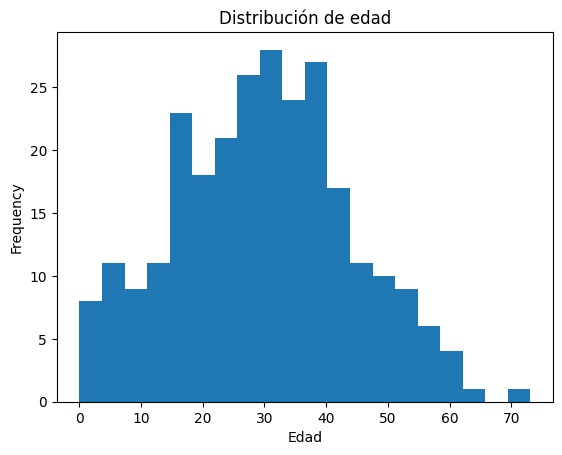

In [37]:
# Histograma de edades
plt.figure()
df['age'].plot(kind='hist', bins=20, title='Distribución de edad')
plt.xlabel('Edad')
plt.show()

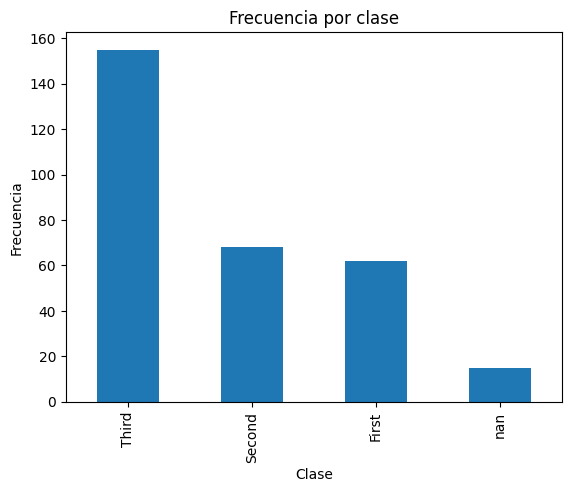

In [38]:
# Conteo por clase (First/Second/Third)
plt.figure()
df['class'].value_counts(dropna=False).plot(kind='bar', title='Frecuencia por clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

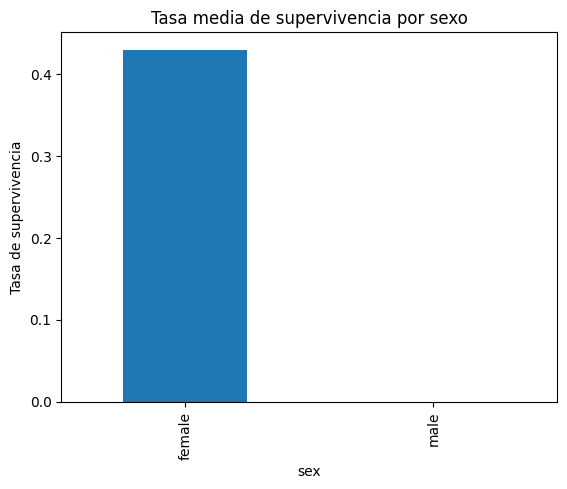

In [39]:
# Supervivencia por sexo (media de survived por categoría)
plt.figure()
df.groupby('sex', observed=True)['survived'].mean().plot(kind='bar', title='Tasa media de supervivencia por sexo')
plt.ylabel('Tasa de supervivencia')
plt.show()

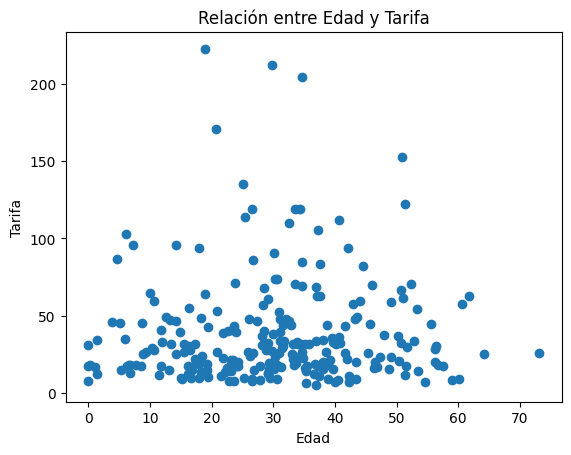

In [40]:
plt.scatter(df['age'], df['fare'])
plt.title('Relación entre Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

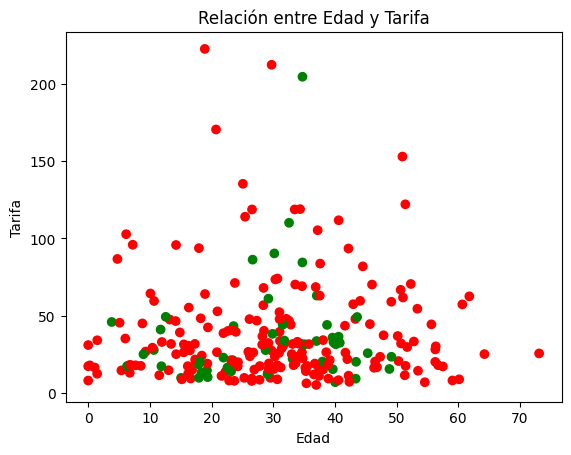

In [41]:
plt.scatter(df["age"], df["fare"], c=colors)
plt.title("Relación entre Edad y Tarifa")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.show()

## 6) Visualizaciones complejas (seaborn)

In [42]:
# Seaborn - configuración visual y ejemplos rápidos
sns.set_style('whitegrid')
sns.set_palette('Set2')
# Nota: si el dataset tiene pocos registros, algunos plots pueden quedar simples

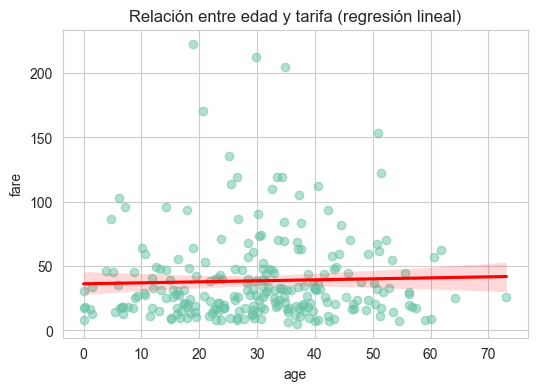

In [43]:
# Scatter con línea de tendencia simple (regplot)
plt.figure(figsize=(6, 4))
sns.regplot(
    x="age", y="fare", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}
)
plt.title("Relación entre edad y tarifa (regresión lineal)")
plt.show()

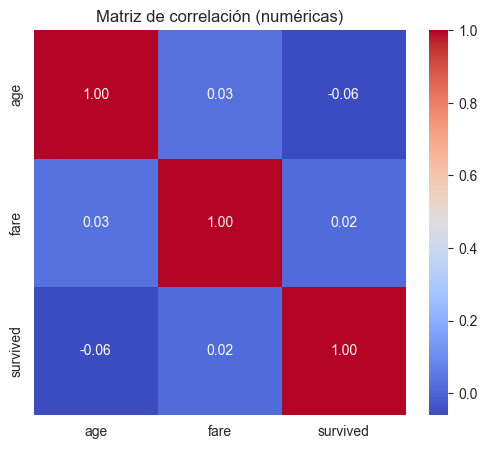

In [44]:
# Heatmap de correlaciones numéricas
plt.figure(figsize=(6, 5))
corr = df.select_dtypes(include=[float, int]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (numéricas)")
plt.show()

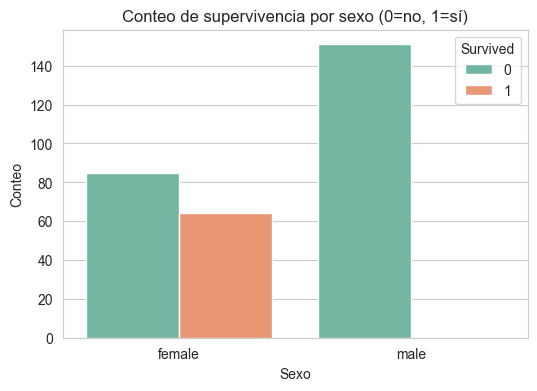

In [45]:
# Ejemplo 1: countplot de supervivencia por sexo
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Conteo de supervivencia por sexo (0=no, 1=sí)')
plt.xlabel('Sexo')
plt.ylabel('Conteo')
plt.legend(title='Survived')
plt.show()

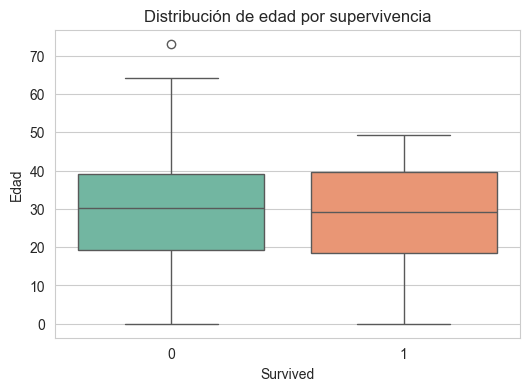

In [46]:
# Ejemplo 2: boxplot de edad por supervivencia
plt.figure(figsize=(6,4))
sns.boxplot(x='survived', y='age', data=df, palette='Set2', hue='survived', legend=False)
plt.title('Distribución de edad por supervivencia')
plt.xlabel('Survived')
plt.ylabel('Edad')
plt.show()

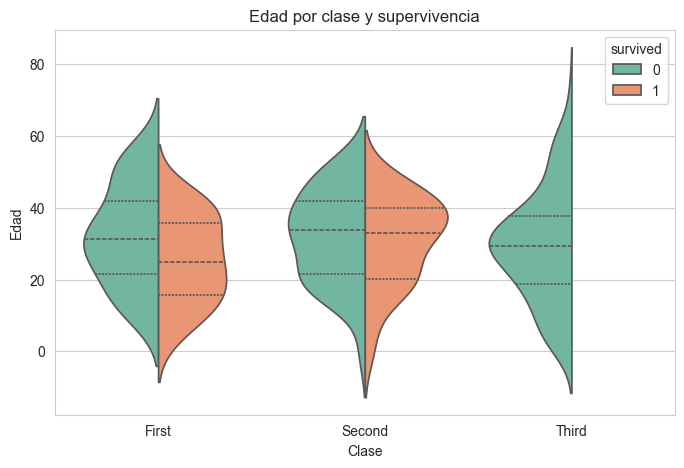

In [47]:
# Ejemplo 3: violinplot de edad por clase y supervivencia (siempre que haya registros suficientes)
plt.figure(figsize=(8,5))
# 'class' es una columna categórica del dataset; usamos 'survived' para hue (0/1)
sns.violinplot(x='class', y='age', hue='survived', data=df, split=True, inner='quartile', palette='Set2')
plt.title('Edad por clase y supervivencia')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()

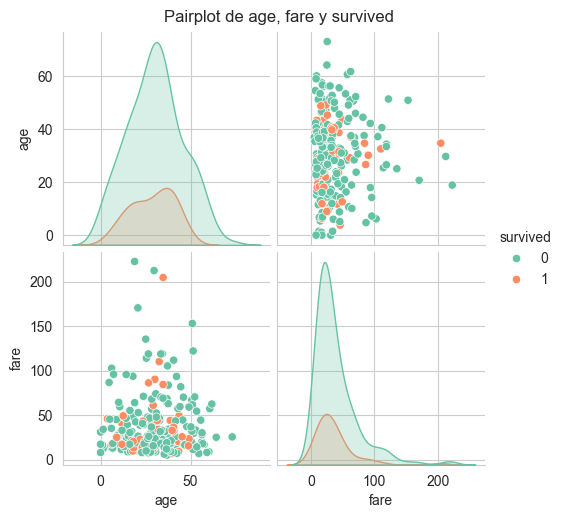

In [48]:
# Ejemplo 5: pairplot rápido para variables seleccionadas
# Selecciona columnas numéricas pequeñas para evitar sobrecarga
cols = ['age', 'fare', 'survived']
sns.pairplot(df[cols].dropna(), hue='survived', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot de age, fare y survived', y=1.02)
plt.show()